In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dopamine Only

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import yaml

from functools import partial
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# local imports
from hydra import compose, initialize
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegAnalyzer import XGBRegAnalyzer, XGBRegAnalyzerFactory
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegrResults import XGBRegrResults
from src.data_processing.model_analyzers.experimenters.experimenters import XGBRegExperimenter
from src.data_processing.model_analyzers.experimenters.batch_experimenters import XGBRegBatchExperimenter



da_only_path = '/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_only_hyperopt_tune_no_reg'
da_experimenter = XGBRegExperimenter(da_only_path, analyzer=XGBRegAnalyzer, results = XGBRegrResults)
da_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id', 'day'])

da_w_day_experimenter = XGBRegExperimenter(
    da_only_path, analyzer=XGBRegAnalyzer, results=XGBRegrResults)
da_w_day_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id'])

# analyzer.fit_best_xgb_model()
# analyzer.plot_model_results()
# 

In [24]:
from dataclasses import dataclass
from typing import List, Dict


@dataclass
class BatchExperimentMetaData:
    main_path: str
    number_of_runs: int
    experiment_conditions: Dict[str, List[str]]
    filter_keys: List[str] = None

In [25]:
main_path = "/projects/p31961/ENIGMA/results/experiments/endpoint_experiments"
n_runs = 20
conditons = None
filter_keywords = ["elastic_net"]

batch_experiment_metadata = BatchExperimentMetaData(
    main_path=main_path,
    number_of_runs=n_runs,
    experiment_conditions=conditons, 
    filter_keys=filter_keywords
)
batch_experimenter = XGBRegBatchExperimenter(batch_experiment_metadata.main_path, batch_experiment_metadata.experiment_conditions)

experiment_directories = batch_experimenter.get_experiment_directories(filter_keywords = batch_experiment_metadata.filter_keys)
experiment_directories

[PosixPath('/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_and_d2_only_hyperopt_tune_no_reg/xgb_regression_da_and_d2_elastic_net'),
 PosixPath('/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_and_d1_only_hyperopt_tune_no_reg/xgb_regression_da_and_d1_elastic_net'),
 PosixPath('/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_only_hyperopt_tune_no_reg/xgb_regression_da_only_hyperopt_elastic_net')]

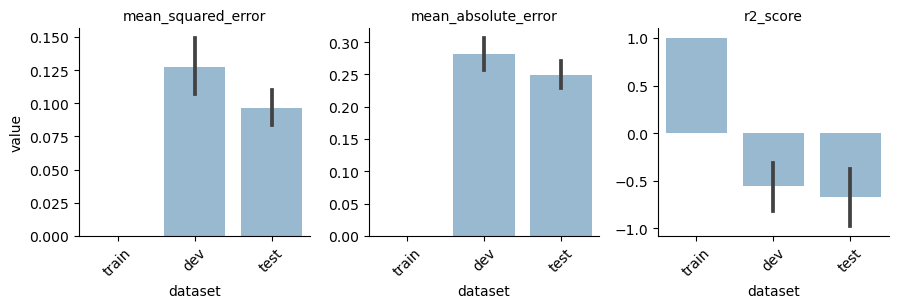

In [125]:
def plot_metrics(experimenter):
    metrics = (experimenter.experiment_results['metric_results']
            .reset_index()
            .rename(columns={'index': 'dataset'})
            .melt(id_vars = "dataset", value_vars = ["mean_squared_error", "mean_absolute_error", "r2_score"], var_name="metric")
    )
    facet = sns.FacetGrid(metrics, col="metric", sharey=False).map(sns.barplot, 'dataset', 'value', order=['train', 'dev', 'test'], alpha=0.5)
    facet.set_xticklabels(rotation=45)
    facet.set_titles("{col_name}")


    

def plot_feature_importance_results(experimenter):
    # Calculate the mean 'importance' for each 'feature'n
    experiment_results = experimenter.experiment_results['feature_importance_results']
    mean_importance = experiment_results.groupby('feature')[
        'importance'].mean()

    # Sort the features by mean 'importance'
    sorted_features = mean_importance.sort_values(ascending=False).index

    # Convert 'feature' to a categorical type with its categories in the order of mean 'importance'
    experiment_results['feature'] = pd.Categorical(
        experiment_results['feature'], categories=sorted_features, ordered=True)
    
    sns.barplot(x='importance', y='feature',
                data=experiment_results, errorbar=('ci', 68), orient='h')
plot_metrics(da_experimenter)


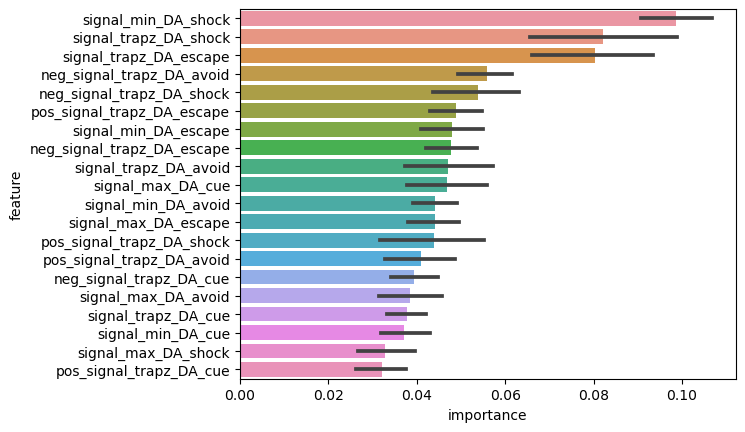

In [120]:
plot_feature_importance_results(da_experimenter)

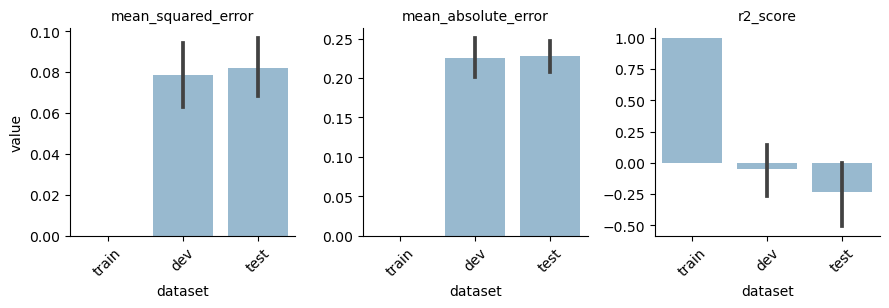

In [126]:
plot_metrics(da_w_day_experimenter)

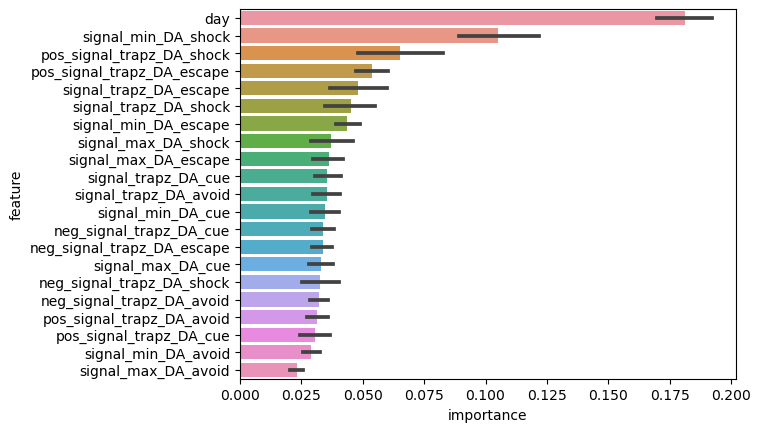

In [122]:
plot_feature_importance_results(da_w_day_experimenter)

# Elastic Net Regularization  =  using L1 and L2

In [123]:
da_net_path = '/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_only_hyperopt_tune_no_reg/xgb_regression_da_only_hyperopt_elastic_net'
da_net_experimenter = XGBRegExperimenter(
    da_net_path, analyzer=XGBRegAnalyzer, results=XGBRegrResults)
da_net_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id', 'day'])

da_w_day_net_experimenter = XGBRegExperimenter(
    da_net_path, analyzer=XGBRegAnalyzer, results=XGBRegrResults)
da_w_day_net_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id'])

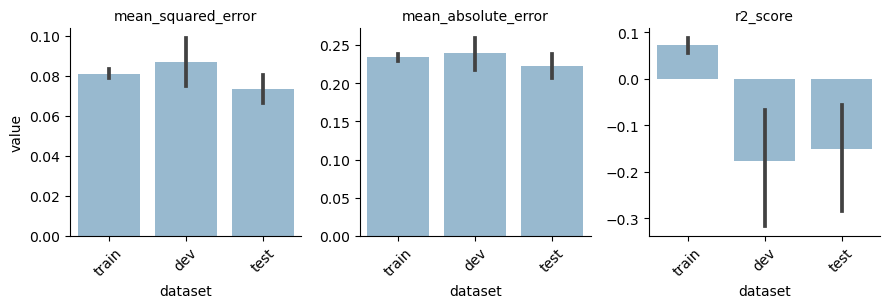

In [127]:
plot_metrics(da_net_experimenter)

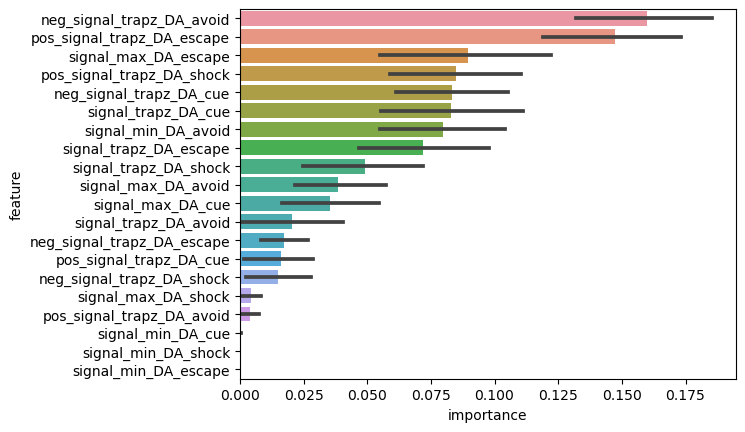

In [110]:
plot_feature_importance_results(da_net_experimenter)

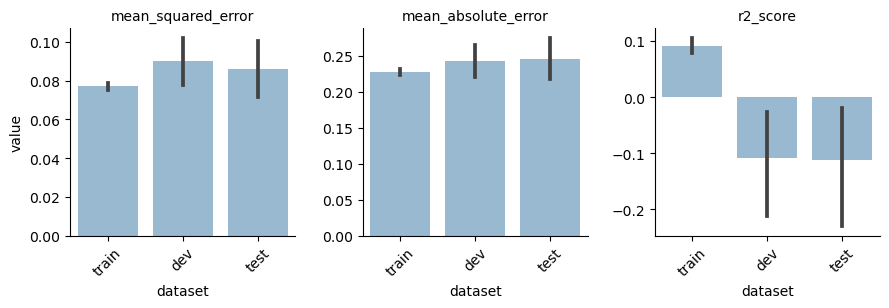

In [128]:
plot_metrics(da_w_day_net_experimenter)

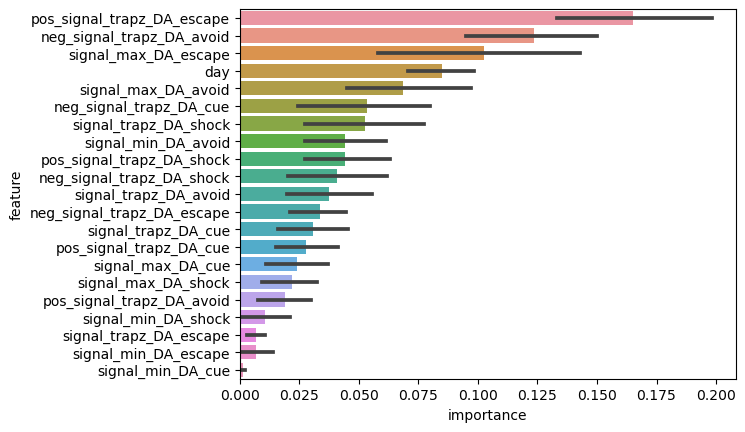

In [129]:
plot_feature_importance_results(da_w_day_net_experimenter)